# Download EMODnet Biology data products

EMODnet Biology provides gridded map layers of several key biodiversity indicators, such as abundance, modeled habitat suitability, and biodiversity indices. Spatially distributed data products specifically relevant to the [Marine Strategy Framework Directive](https://ec.europa.eu/environment/marine/eu-coast-and-marine-policy/marine-strategy-framework-directive_en) (MSFD) are also created. These products are generated as [NetCDF files](https://www.unidata.ucar.edu/software/netcdf/), compliant with the [COARDS](https://www.unidata.ucar.edu/software/netcdf/COARDS.html) and [CF conventions](https://cf-conventions.org/), following [strict guidelines](https://github.com/EMODnet/EMODnet-Biology-NetCDF-Guide) to ensure that each data product is accessible from a single access point and contains all necessary metadata for proper interpretation. These products are hosted on the EMODnet [ERDDAP server](https://erddap.emodnet.eu/erddap/). 

In R, the [`rerddap`](https://docs.ropensci.org/rerddap/) package can be used to query ERDDAP servers. We will also use [`dplyr`](https://dplyr.tidyverse.org/) to manipulate data, [`worrms`](https://docs.ropensci.org/worrms/) to find out species in the [World Register of Marine Species (WoRMS)](http://www.marinespecies.org/), and [`ggplot2`](https://ggplot2.tidyverse.org/) to visualize data.


In [8]:
# install.packages("rerddap")
# install.packages("dplyr")
# install.packages("worrms")
# install.packages("ggplot2")

In [1]:
library(rerddap)
library(dplyr)
library(worrms)
library(ggplot2)

# This is the url where the EMODnet ERDDAP server is located
erddap_url <- "https://erddap.emodnet.eu/erddap/"

# Find datasets with the key words "EMODnet Biology"
ed_search(query = "EMODnet Biology", url = erddap_url, which = "griddap")[[1]]




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




title,dataset_id
<chr>,<chr>
Presence/Absence maps of phytoplankton in the Greater Baltic Sea,biology_phyto_6618_BalticSea_8b1e_5c90_9a2c
Presence/Absence maps of phytoplankton in the Greater North Sea,biology_6587_phyto_NorthSea_4bd1_a08c_0019
Phytoplankton alpha diversity in the greater Baltic Sea area,biology_8221_a45b_17fb_beeb
"Habitat Suitability Maps for Asparagopsis armata, Caulerpa Taxifolia, Sargassum muticum and Undaria pinnatifida",biology_8209_b262_6965_fbc0
Interpolated abundance based on presence/absence of Calanus_finmarchicus and Calanus_helgolandicus,biology_8220_a8b5_8cec_1c23
Data product numerical abundance of benthic macroinvertebrates in North Sea and Baltic Sea,biology_6648_Benthos_NorthSea-BalticSea_7eb9_d3ea_6c8d
Probability maps for different benthos species in the North Sea,biology_6640_benthos_NorthSea_e4af_0f0e_6a73
"Summary presence/absence maps of macro-endobenthos in the greater North Sea, based on nearly 100,000 samples from 65 assembled monitoring data sets",biology_benthos_6617_5e82_1108_e2c8
Probability of occurrence 3D map,biology_3Dmaps_b1af_c515_4ef4


This search displays only the title and dataset_id of the dataset. Another way is to retrieve the whole list of datasets with `ed_datasets()` and then look up specific keywords. 

In [2]:
# Retrieve the list of datasets from the ERDDAP server
datasets <- ed_datasets(which = "griddap", url = erddap_url) 

# Display the column names of the datasets
colnames(datasets)

# Select relevant columns and filter datasets with "fish" in the summary
datasets |> 
  select(Title, Summary, Dataset.ID) |> 
  filter(grepl("fish", Summary, ignore.case = TRUE))


[1] "griddap"         "Subset"          "tabledap"        "Make.A.Graph"   
 [5] "wms"             "files"           "Title"           "Summary"        
 [9] "FGDC"            "ISO.19115"       "Info"            "Background.Info"
[13] "RSS"             "Email"           "Institution"     "Dataset.ID"

Title,Summary,Dataset.ID
<chr>,<chr>,<chr>
Density of Loggerhead Turtles in the Mediterranean Sea,"Loggerhead turtles are a globally vulnerable species of marine turtle. The Mediterranean Sea subpopulation, which ranges throughout the entire Mediterranean basin, is listed as least concern but experiences significant threats in the region including bycatch in fisheries, climate change, coastal development, and marine pollution. Broad-scale patterns of distribution and abundance can provide regional managers a tool to effectively conserve and manage this species at basin and sub-basin scales. Here NUWC uses aerial and shipboard line transect survey data collected between 2003 and 2018 to estimate density and abundance throughout the Mediterranean Sea using distance sampling methodology. A spatial density model estimating loggerhead density, abundance, and distribution across the Mediterranean Sea was generated as a long-term annual average. The model was adjusted for availability bias using dive data from loggerhead turtles tagged with time depth recorders from multiple regions within the Mediterranean Sea. Geographic extrapolation in areas near surveys was undertaken with caution. Mean abundance for the long-term average model was estimated as 994,000 CV 0.20. This estimate represents the first basin-wide estimate of abundance for this species in the Mediterranean not based on demographic models. These data have been re-projected from the original published data presented in DiMatteo et al. 2024, in order to meet EMODnet technical requirements. Small spatial mismatches and value discrepancies between the original model and the version available here may exist but have not been formally assessed. cdm_data_type = Grid VARIABLES (all of which use the dimensions [y][x]): abundance (Abundance of biological entity specified elsewhere per unit area of the bed) coefficient_of_variation",biology_8514_94a0_0784_7406
"Modelled projections of habitat for commercial fish around North-western Europe under climate change, 2020 to 2060","Environmental Niche Model (ENM) outputs for 49 commercial fish species under climate change until the decade of 2060 around northwestern Europe. A model ensemble of 5 ENMs was used (MaxEnt, Generalised Linear Models, Support Vector Machine, Random Forest and BIOCLIM ), and projections were made under three different emission scenarios: A1B, RCP4.5 and RCP 8.5. The data shows model agreement (normalised to 1) for presence/absence decadal projections from 2020 to 2060. Additionally we provide data on model performance, with the Area Under the Curve (AUC) scores of the Receiver Operator Characteristic (ROC) curve for each of the 5 ENMs trained for each combination of fish species and emission scenario. Only ENMs with an AUC score of at least 0.7 were considered. cdm_data_type = Grid VARIABLES (all of which use the dimensions [emmision_scenario][aphiaid][time][latitude][longitude]): probability_of_occurrence (Probability of occurrence of biological entity)",biology_8522_mod_habitats_comm_fish_2090_f23a_5ced
"Modelled projections of habitat for fish species feeding guilds around North-western Europe under climate change, 2010 to 2095",These data are Bayesian Additive Regression Tree model annual predictions for habitat suitability of marine fish species across a range of body sizes and belonging to different feeding guilds from 2010 to 2095 in 5 year intervals in the northeast Atlantic shelf seas. Feeding guilds were allocated based on classifications following Thompson et al. (2020). cdm_data_type = Grid VARIABLES (all of which use the dimensions [time][aphiaid][feeding_guild][emission_scenario][y][x]): probability_of_occurrence (Probability of occurrence of biological entity),biology_8598_78b9_0ca5_9176
Probability of occurrence 3D map,"3-D habitat suitability maps (HSMS) or probability of occurrence maps for main commercial fish species, built using Shape-Constrained Generalized Additive Models (SC-GAMs) cdm_dat

Let's have a closer look at the *Probability of occurrence 3D map* data product. Using its dataset identifier we can get more information, including the structure of the data, its dimensions and variables, and metadata.

In [3]:
# Retrieve detailed information about the dataset with the specified dataset ID
dataset_info <- info(datasetid = "biology_3Dmaps_b1af_c515_4ef4", url = erddap_url)

# Display a summary of the dataset
dataset_info

# Display all metadata (attributes) associated with the dataset
dataset_info$alldata

<ERDDAP info> biology_3Dmaps_b1af_c515_4ef4 
 Base URL: https://erddap.emodnet.eu/erddap 
 Dataset Type: griddap 
 Dimensions (range):  
     aphiaid: (126285, 127427) 
     depth: (0, 1000) 
     latitude: (-82.875, 89.875) 
     longitude: (-97.875, 68.375) 
 Variables:  
     occurrence_probability: 

row_type,variable_name,attribute_name,data_type,value
<chr>,<chr>,<chr>,<chr>,<chr>
attribute,NC_GLOBAL,acknowledgement,String,We acknowledge Ocean Biodiversity Information System (OBIS; https://obis.org/) and the Global Biodiversity Information Facility (GBIF; https://www.gbif.org/) for providing fish global occurrences studied here. We also thank to publicly available datasets Copernicus (http://marine.copernicus.eu/services-portfolio/access-to-products/) and the World Ocean Atlas (https://www.ncei.noaa.gov/products/world-ocean-atlas) for providing environmental data
attribute,NC_GLOBAL,cdm_data_type,String,Grid
attribute,NC_GLOBAL,citation,String,"Valle, M., E. RamÃ­rez-Romero, L. Ibaibarriaga, L. Citores, J. A. Fernandes-Salvador, and G. Chust. 2024. Pan-Atlantic 3D distribution model incorporating water column for commercial fish. Ecological Modelling 490:110632. https://doi.org/10.1016/j.ecolmodel.2024.110632"
attribute,NC_GLOBAL,comment,String,Uses attributes recommended by https://cfconventions.org
attribute,NC_GLOBAL,Conventions,String,"CF-1.8, COARDS, ACDD-1.3"
attribute,NC_GLOBAL,creator_email,String,mvalle@azti.es
attribute,NC_GLOBAL,creator_institution,String,"AZTI, Marine research, Basque Research and Technology Alliance (BRTA)"
attribute,NC_GLOBAL,creator_name,String,Mireia Valle
attribute,NC_GLOBAL,creator_type,String,person


Note the aphiaid dimension. This is the AphiaID, the unique identifier of species names in the [World Register of Marine Species (WoRMS)](http://www.marinespecies.org/). In R, the [`worrms`](https://docs.ropensci.org/worrms/) package from rOpenSci allows interaction with the WoRMS database. It is possible to look up species names and get an AphiaID, which we can later pass to the dataset to filter for certain species.

For instance, as this dataset has commercial fish species, less find out the AphiaID of the european anchovy *Engraulis encrasicolus*.

In [4]:
# Look up the aphiaid of the european anchovy, Engraulis encrasicolus
anchovy_info <- wm_records_name(name = "Engraulis encrasicolus")
anchovy_info

# Extract the aphiaid
anchovy_aphiaid <- anchovy_info$AphiaID[1]

AphiaID,url,scientificname,authority,status,unacceptreason,taxonRankID,rank,valid_AphiaID,valid_name,⋯,genus,citation,lsid,isMarine,isBrackish,isFreshwater,isTerrestrial,isExtinct,match_type,modified
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<lgl>,<chr>,<chr>
126426,https://www.marinespecies.org/aphia.php?p=taxdetails&id=126426,Engraulis encrasicolus,"(Linnaeus, 1758)",accepted,NA,220,Species,126426,Engraulis encrasicolus,⋯,Engraulis,"Froese, R. and D. Pauly. Editors. (2024). FishBase. Engraulis encrasicolus (Linnaeus, 1758). Accessed through: World Register of Marine Species at: https://www.marinespecies.org/aphia.php?p=taxdetails&id=126426 on 2024-12-05",urn:lsid:marinespecies.org:taxname:126426,1,1,0,0,NA,like,2008-01-15T17:27:08.177Z
248041,https://www.marinespecies.org/aphia.php?p=taxdetails&id=248041,Engraulis encrasicolus ponticus,"Alexandrov, 1927",unaccepted,synonym,230,Subspecies,126426,Engraulis encrasicolus,⋯,Engraulis,"WoRMS (2024). Engraulis encrasicolus ponticus Alexandrov, 1927. Accessed at: https://www.marinespecies.org/aphia.php?p=taxdetails&id=248041 on 2024-12-05",urn:lsid:marinespecies.org:taxname:248041,1,NA,NA,0,NA,like,2013-03-21T14:04:45.903Z
322685,https://www.marinespecies.org/aphia.php?p=taxdetails&id=322685,Engraulis encrasicolus russoi,"Dulzetto, 1947",unaccepted,NA,230,Subspecies,126426,Engraulis encrasicolus,⋯,Engraulis,"Froese, R. and D. Pauly. Editors. (2024). FishBase. Engraulis encrasicolus russoi Dulzetto, 1947. Accessed through: World Register of Marine Species at: https://www.marinespecies.org/aphia.php?p=taxdetails&id=322685 on 2024-12-05",urn:lsid:marinespecies.org:taxname:322685,1,1,0,0,NA,like,2023-01-11T08:59:53.383Z


We are now ready to query the dataset. We have seen that the dimensions are:
1. AphiaID
2. Depth
3. Latitude
4. Longitude

Let's get the probability of occurrance of the european anchovy around the Strait of Gibraltar. This species is epipelagic, ranging from surface to 200m depth.

In [5]:
# Retrieve the data for the European anchovy (Engraulis encrasicolus) from the EMODnet ERDDAP server
df <- griddap(
    datasetx = dataset_info, 
    aphiaid = rep(anchovy_aphiaid, 2), # Need to add as a range, but in fact it is a single value
    depth = c(0, 200),
    latitude = c(34, 38),
    longitude = c(-10, 0)
)

# Inspect the data
df

info() output passed to x; setting base url to: https://erddap.emodnet.eu/erddap



<ERDDAP griddap> biology_3Dmaps_b1af_c515_4ef4
   Path: [/tmp/Rtmpb0R0vv/R/rerddap/62fe5b00817b4cab12408e649e679191.nc]
   Last updated: [2024-12-05 10:16:34.454783]
   File size:    [0.14 mb]
   Dimensions (dims/vars):   [4 X 1]
   Dim names: aphiaid, depth, latitude, longitude
   Variable names: Probability of occurrence of biological entity
   data.frame (rows/columns):   [17425 X 5]
# A tibble: 17,425 × 5
   longitude  latitude     depth   aphiaid occurrence_probability
   <dbl[1d]> <dbl[1d]> <int[1d]> <int[1d]>                  <dbl>
 1     -9.88      34.1         0    126426               2.21e-12
 2     -9.62      34.1         0    126426               2.40e-12
 3     -9.38      34.1         0    126426               4.25e-12
 4     -9.12      34.1         0    126426               6.53e-11
 5     -8.88      34.1         0    126426               5.72e- 9
 6     -8.62      34.1         0    126426               3.04e- 7
 7     -8.38      34.1         0    126426               1.

We are now ready to do anything we want with these data. For instance, we can check the depth profile

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.027   0.330   0.819   0.990    8987 

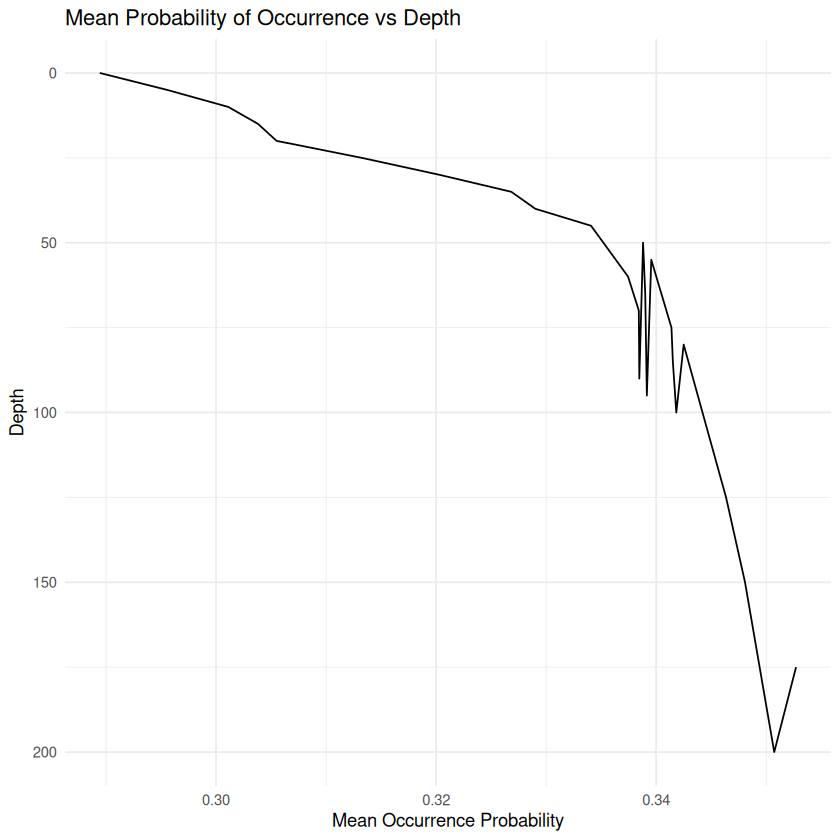

In [6]:
# Summary of the data
summary(df$data$occurrence_probability)

# Calculate mean probability of occurrence for each depth
mean_prob_per_depth <- df$data |> 
    group_by(depth) |> 
    summarize(mean_probability = mean(occurrence_probability, na.rm = TRUE))

# Plot mean probability of occurrence vs depth with inverted y-axis
ggplot(mean_prob_per_depth, aes(x = mean_probability, y = depth)) +
    geom_line() +
    scale_y_reverse() +
    theme_minimal() +
    labs(title = "Mean Probability of Occurrence vs Depth", x = "Mean Occurrence Probability", y = "Depth")

We could also plot the data in a map. For instance, where the probability of occurrence seems to be the highest at 175m depth

In [ ]:
# Convert the data to a dataframe for plotting
df_plot <- as.data.frame(df$data) |> filter(depth == 175)

# Plot the data
ggplot(df_plot, aes(x = longitude, y = latitude, fill = occurrence_probability)) +
    geom_tile() +
    scale_fill_viridis_c() +
    theme_minimal() +
    labs(
        title = "Probability of Occurrence of Engraulis encrasicholus at 175m depth", 
        x = "Longitude", 
        y = "Latitude", 
        fill = "Occurrence Probability"
    )

ERROR: Error: object 'test_df' not found
